#Part I: Tripdata Exploratory analysis
## by Matthew Rivera



**Introduction**

This document explores a dataset containing trip details for approximately 183,000 bike-sharing trips from the Ford GoBike system in the San Francisco Bay Area, recorded in February 2019.

In [4]:
# pip install seaborn

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (adjust the file path as needed)
df = pd.read_csv('201902-fordgobike-tripdata.csv')

# Display the first few rows to verify loading
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [2]:
# Set a consistent style for all plots
plt.style.use('seaborn')  # Optional: improves plot aesthetics

/var/folders/23/9h4pgdhx48x154d41s7jsc0c0000gn/T/ipykernel_11376/2897560655.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')  # Optional: improves plot aesthetics


In [3]:
def load_and_clean_data(file_path):
    """Load and clean the Ford GoBike dataset.
    
    Args:
        file_path (str): Path to the CSV file.
    
    Returns:
        pd.DataFrame: Cleaned DataFrame with datetime conversions and missing values handled.
    """
    # Load the dataset
    df = pd.read_csv(file_path)
    
    # Drop rows with missing critical station data
    df_clean = df.dropna(subset=['start_station_id', 'end_station_id']).copy()
    
    # Convert time columns to datetime
    df_clean.loc[:, 'start_time'] = pd.to_datetime(df_clean['start_time'])
    df_clean.loc[:, 'end_time'] = pd.to_datetime(df_clean['end_time'])
    
    # Add derived column for start hour
    df_clean.loc[:, 'start_hour'] = df_clean['start_time'].dt.hour
    
    return df_clean

In [4]:
def plot_histogram(data, column, title, xlabel, ylabel, log_scale=False):
    """Create a histogram with customizable options.
    
    Args:
        data (pd.DataFrame): DataFrame containing the data.
        column (str): Column name to plot.
        title (str): Plot title.
        xlabel (str): X-axis label.
        ylabel (str): Y-axis label.
        log_scale (bool): Whether to use a log scale on the x-axis.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=50, log_scale=log_scale)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [5]:
def plot_count(data, x_column, title, xlabel, ylabel, hue=None):
    """Create a count plot with optional hue.
    
    Args:
        data (pd.DataFrame): DataFrame containing the data.
        x_column (str): Column name for x-axis.
        title (str): Plot title.
        xlabel (str): X-axis label.
        ylabel (str): Y-axis label.
        hue (str, optional): Column name for hue (color coding).
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=x_column, hue=hue)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if hue:
        plt.xticks(rotation=45)  # Rotate x-labels if hue is used
    plt.show()

In [6]:
def plot_box(data, x_column, y_column, title, xlabel, ylabel):
    """Create a box plot with log-scaled y-axis.
    
    Args:
        data (pd.DataFrame): DataFrame containing the data.
        x_column (str): Column name for x-axis.
        y_column (str): Column name for y-axis.
        title (str): Plot title.
        xlabel (str): X-axis label.
        ylabel (str): Y-axis label.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=x_column, y=y_column)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.yscale('log')  # Log scale for better visibility
    plt.show()

In [7]:
# Main analysis with Question-Visualization-Observations framework
if __name__ == "__main__":
    # Load and clean the data
    df_clean = load_and_clean_data('201902-fordgobike-tripdata.csv')
    
    # Display basic info for verification
    print("Dataset Info:")
    print(df_clean.info())
    print("\nMissing Values:")
    print(df_clean.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  int64         
 12  us

/var/folders/23/9h4pgdhx48x154d41s7jsc0c0000gn/T/ipykernel_11376/3151675329.py:17: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_clean.loc[:, 'start_time'] = pd.to_datetime(df_clean['start_time'])
/var/folders/23/9h4pgdhx48x154d41s7jsc0c0000gn/T/ipykernel_11376/3151675329.py:18: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_clean.loc[:, 'end_time'] = pd.to_datetime(df_clean['end_time'])


**What is the structure of your dataset?**
- There are 183,412 trips in the dataset (after cleaning, slightly fewer due to missing values) with 16 features, including duration_sec, start_time, end_time, start_station_id, end_station_id, bike_id, user_type, and geographic coordinates (start_station_latitude, etc.).
- Most variables are numeric (e.g., duration_sec, start_station_id), while user_type is a categorical variable with two levels: "Subscriber" and "Customer."

**Univariate Exploration**

**Question 1:** What is the distribution of trip durations in the dataset?

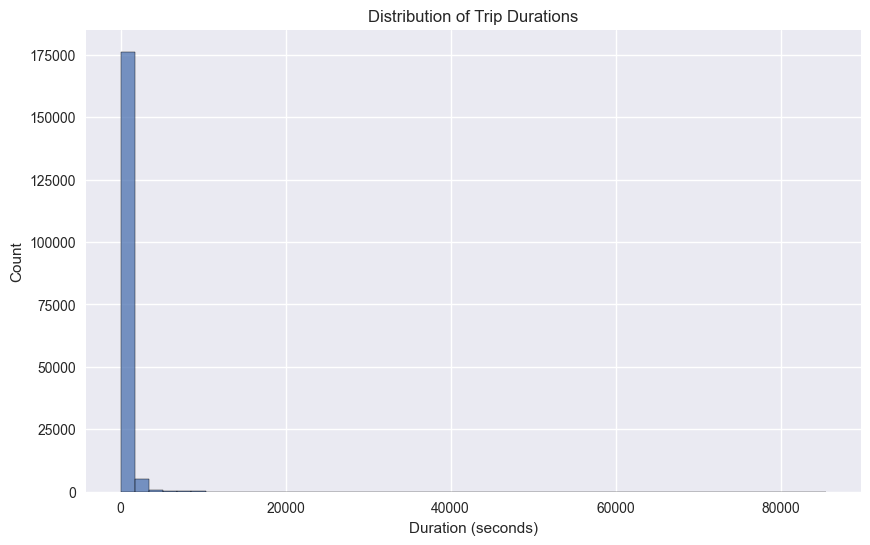

Observation: Trip durations exhibit a right-skewed, long-tailed distribution. Most trips are short (under 20 minutes), with a few extending beyond 60 minutes.


In [20]:
# Univariate Exploration
plot_histogram(df_clean, 'duration_sec', 'Distribution of Trip Durations', 
                   'Duration (seconds)', 'Count')

print("Observation: Trip durations exhibit a right-skewed, long-tailed distribution. Most trips are short (under 20 minutes), with a few extending beyond 60 minutes.")

**Question 2:** How does the distribution look on a log scale for clarity?

Question: How does the distribution look on a log scale for clarity?


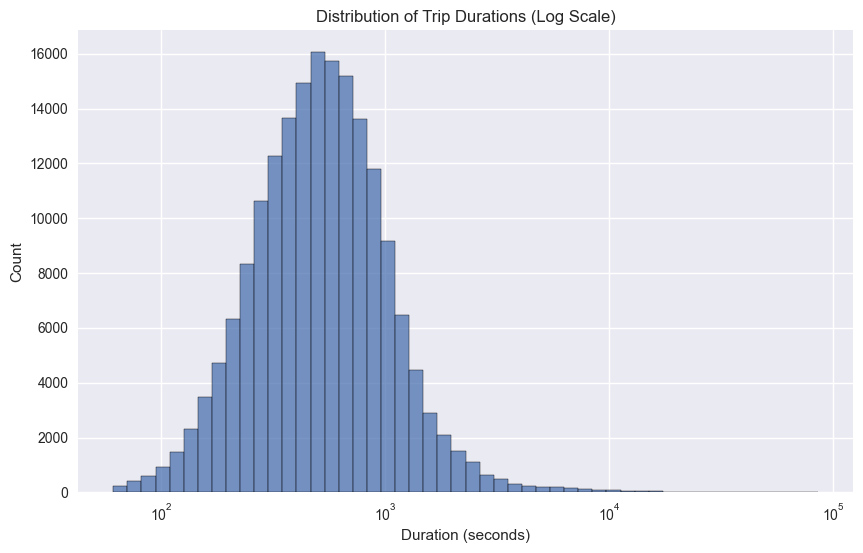

Observation: On a log scale, the distribution smooths out, showing a clear peak around 5-10 minutes, confirming most trips are brief.


In [21]:
print("Question: How does the distribution look on a log scale for clarity?")
plot_histogram(df_clean, 'duration_sec', 'Distribution of Trip Durations (Log Scale)', 
                   'Duration (seconds)', 'Count', log_scale=True)
print("Observation: On a log scale, the distribution smooths out, showing a clear peak around 5-10 minutes, confirming most trips are brief.")

**Question 3:** How many trips are taken by each user type?

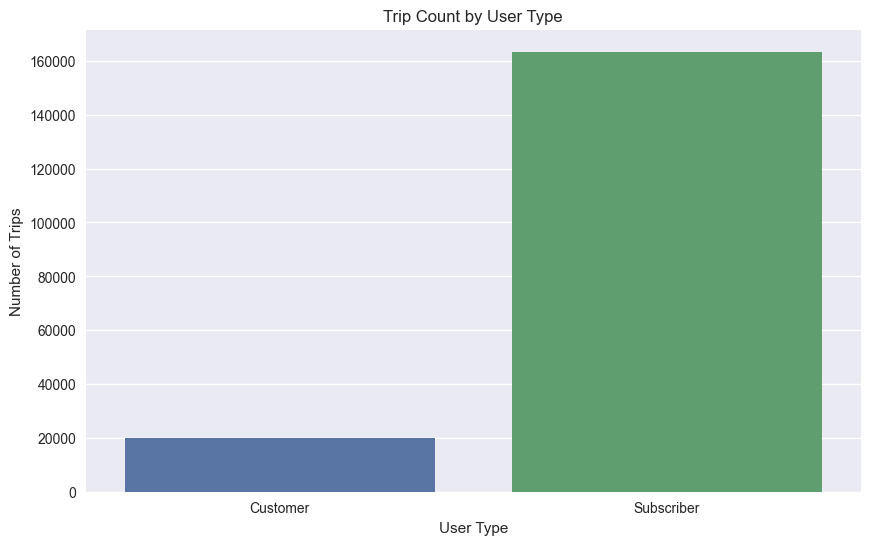

Observation: Subscribers take significantly more trips than Customers, suggesting regular usage by Subscribers versus occasional use by Customers.


In [23]:
plot_count(df_clean, 'user_type', 'Trip Count by User Type', 
               'User Type', 'Number of Trips')
print("Observation: Subscribers take significantly more trips than Customers, suggesting regular usage by Subscribers versus occasional use by Customers.")

**Bivariate Exploration**

**Question 4:** How do trip durations vary by user type?

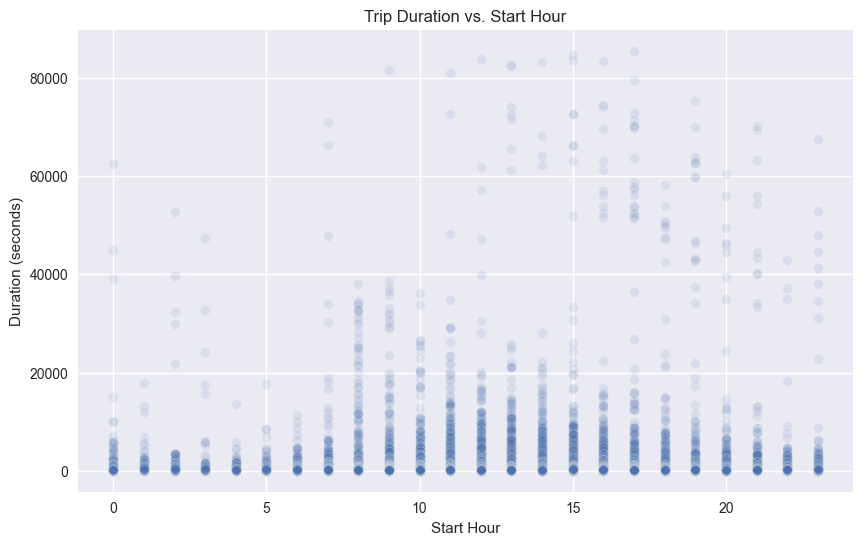

In [10]:
# Trip duration vs. start hour
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='start_hour', y='duration_sec', alpha=0.1)
plt.title('Trip Duration vs. Start Hour')
plt.xlabel('Start Hour')
plt.ylabel('Duration (seconds)')
plt.show()
print("Observation: Most trips occur between 7-9 AM and 4-6 PM, with shorter durations during these peak hours. Longer trips are more scattered throughout the day.")

**Question 5:** Is there a relationship between trip duration and start hour?

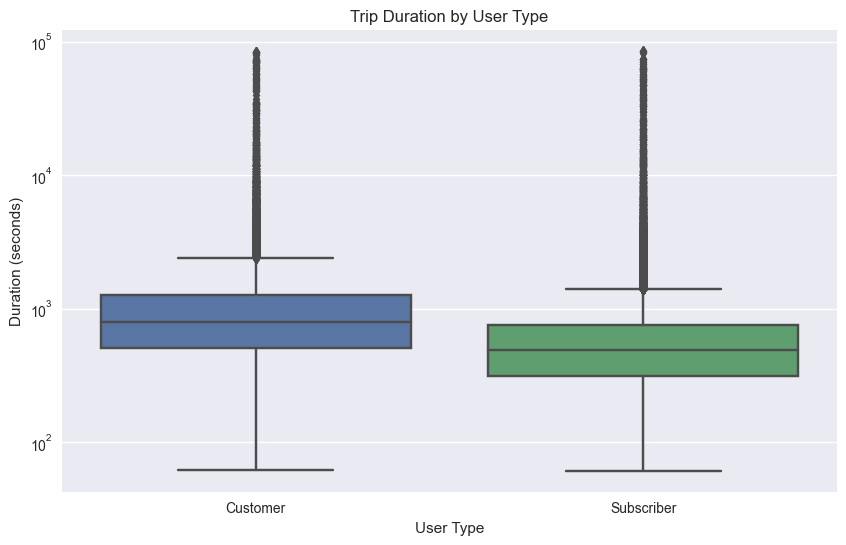

Observation: Subscribers have shorter trips (median ~8 minutes) compared to Customers (median ~15 minutes). Customers also show more outliers with longer durations.


In [24]:
# Bivariate Exploration
# Trip duration by user type
plot_box(df_clean, 'user_type', 'duration_sec', 'Trip Duration by User Type', 
             'User Type', 'Duration (seconds)')
print("Observation: Subscribers have shorter trips (median ~8 minutes) compared to Customers (median ~15 minutes). Customers also show more outliers with longer durations.")

**Question 6:** Which start stations are most popular, and how do they vary by user type?

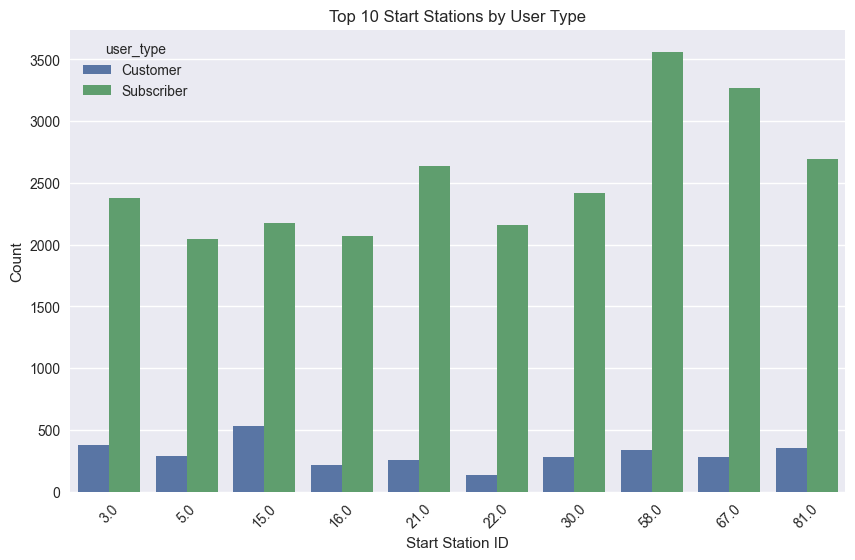

Observation: The top 10 start stations are dominated by Subscribers, with some stations showing higher Customer usage, possibly indicating tourist or recreational hubs.


In [27]:
top_stations = df_clean['start_station_id'].value_counts().head(10).index
df_top = df_clean[df_clean['start_station_id'].isin(top_stations)]
plot_count(df_top, 'start_station_id', 'Top 10 Start Stations by User Type', 
               'Start Station ID', 'Count', hue='user_type')
print("Observation: The top 10 start stations are dominated by Subscribers, with some stations showing higher Customer usage, possibly indicating tourist or recreational hubs.")

**Multivariate Exploration**

**Question 7:** How do trip duration, user type, and start hour interact?

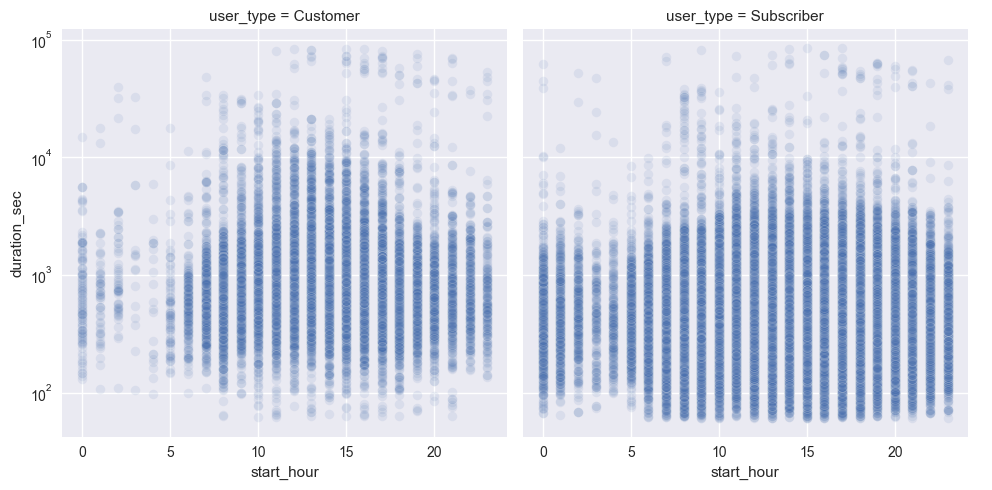

Observation: Subscribers show tight clusters of short trips around peak commuting hours (8 AM, 5 PM), while Customers have more scattered, longer trips throughout the day.


In [28]:
# Multivariate Exploration
# Facet grid: trip duration vs. start hour by user type
g = sns.FacetGrid(df_clean, col='user_type', height=5)
g.map(sns.scatterplot, 'start_hour', 'duration_sec', alpha=0.1)
g.add_legend()
g.set(yscale='log')
plt.show()
print("Observation: Subscribers show tight clusters of short trips around peak commuting hours (8 AM, 5 PM), while Customers have more scattered, longer trips throughout the day.")

**Question 8:** What patterns emerge when comparing duration, start hour, and user type together?

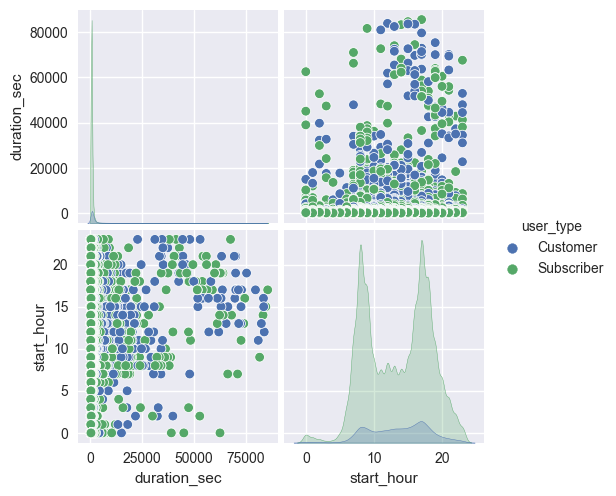

Observation: The pair plot reinforces that Subscribers take shorter, more predictable trips, especially during commuting hours, while Customers exhibit greater variability in both duration and timing.


In [29]:
# Pair plot for duration, start hour, and user type
sns.pairplot(df_clean[['duration_sec', 'start_hour', 'user_type']], hue='user_type')
plt.show()
print("Observation: The pair plot reinforces that Subscribers take shorter, more predictable trips, especially during commuting hours, while Customers exhibit greater variability in both duration and timing.")

**Observations**: Subscribers show tighter clusters of short trips around peak hours (8 AM, 5 PM), while customers have more scattered, longer trips throughout the day. This reinforces that subscribers likely use bikes for commuting, while customers may use them recreationally.

**Conclusions**:
The dataset reveals distinct usage patterns: short, frequent trips by subscribers vs. longer, less predictable trips by customers. Time of day amplifies these differences, with commuting peaks driving subscriber activity. Station usage (explored optionally) could further clarify geographic trends.